In [1]:
import numpy
import chainer
from chainer.variable import Variable
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from generator import Generator
from chainer.serializers import load_npz
from utils import plot_kde_data, plot_scatter_data
import seaborn as sns
sns.set()

/Users/yohei/.pyenv/versions/3.6.4/envs/chainer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/yohei/.pyenv/versions/3.6.4/envs/chainer/lib/python3.6/site-packages/chainer/_environment_check.py:38: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Also note that Chainer does not officially support Mac OS X.
Please use it at your own risk.

  ''')  # NOQA


In [2]:
data_size=10000
seed=0
epochs = [10, 30, 100, 200]

In [3]:
def plot_scatter_data(data, epoch, axes, **kwards):                                    
    """
      Plot the data
  
      Parameters
      --------------
      data: array whose shape is (datasize, 2)
         plotted data
 
     epoch: int
         Epoch number
 
     preview_path: PosixPath
         file path to save plotted results
 
     **kwards: key, value pairings
         other keyward argument to pass to seaborn.kdeplot
    """
    axes.scatter(data[:, 0], data[:, 1],
                 alpha=0.5, color='darkgreen', s=17)
    axes.set_title('epoch: {:>3}'.format(epoch))
        
    axes.set_xlim(-2-1.5, 2+1.5)
    axes.set_ylim(-2-1.5, 2+1.5)

In [11]:
def plot_kde_data(data, epoch, axes, **kwards):
    """
     Plot the data

     Parameters
     --------------
     data: array whose shape is (datasize, 2)
         plotted data
 
     epoch: int
         Epoch number
 
     preview_path: PosixPath
         file path to save plotted result
 
     **kwards: key, value pairings
         other keyward argument to pass to seaborn.kdeplot
     """
    axes = sns.kdeplot(data=data[:, 0], data2=data[:, 1],
                        ax=axes, shade=True, shade_lowest=False, **kwards)
    axes.set_title('epoch: {:>3}'.format(epoch))
    axes.set_xlim(-2-1.5, 2+1.5)
    axes.set_ylim(-2-1.5, 2+1.5)


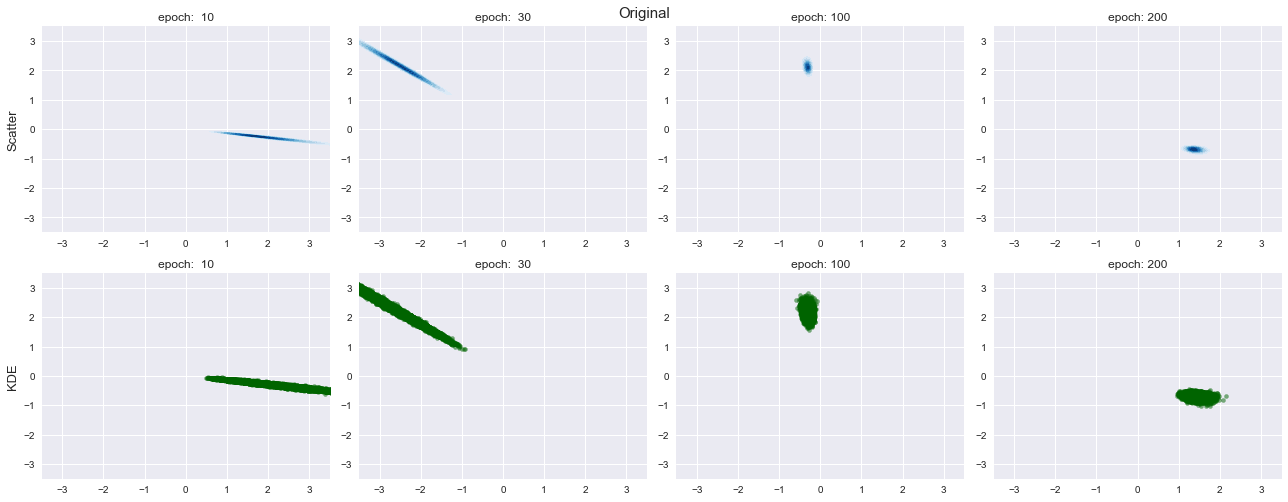

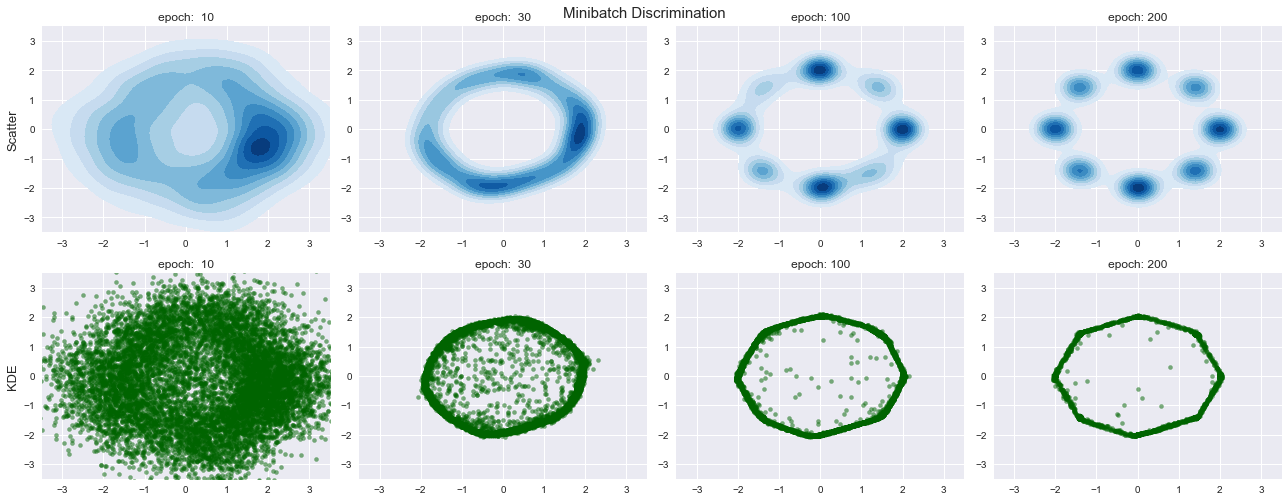

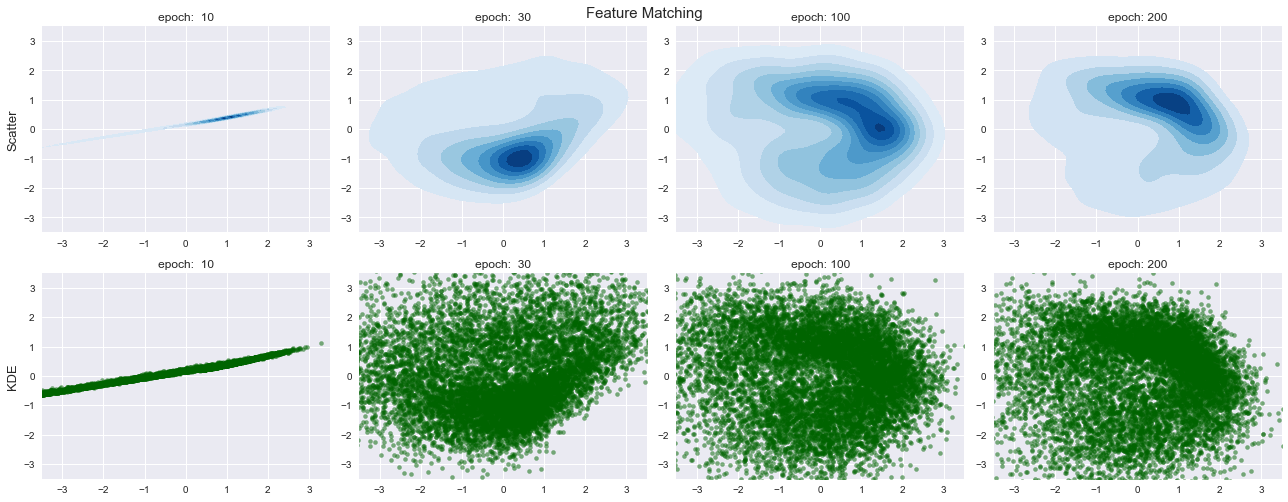

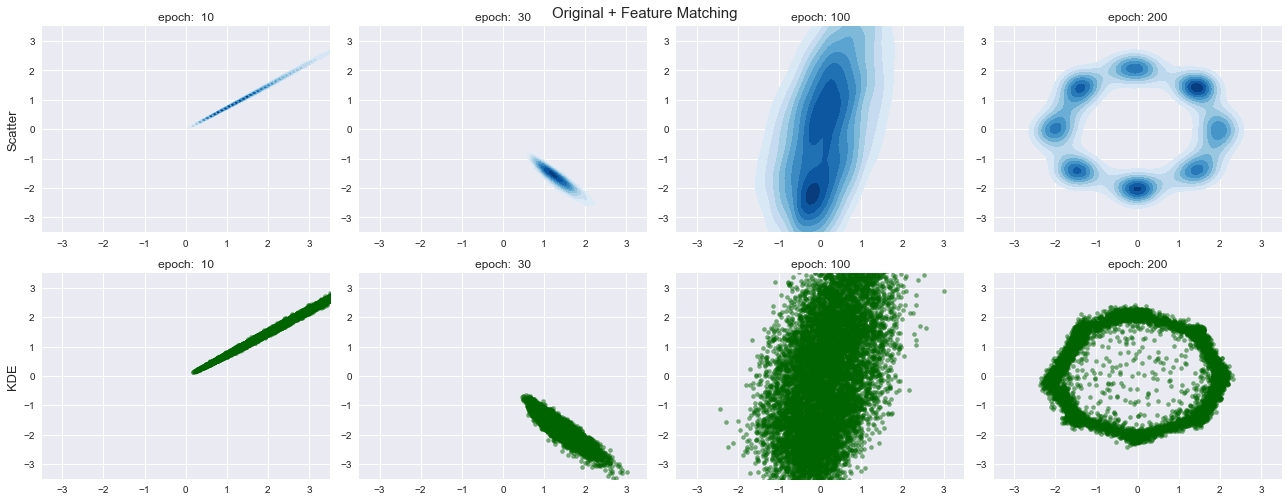

In [17]:
for i in [1, 2, 3, 5]:
    fig, axes = plt.subplots(2, len(epochs), figsize=(18, 7))
    for epoch, j in zip(epochs, range(4)):
        path = pathlib.Path("result_{0}/gen_epoch_{1}.npz".format(i, epoch))
        gen = Generator(isBN=False)
        load_npz(path, gen)
        np.random.seed(seed)
        z = gen.make_hidden(batchsize=data_size)
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                z = Variable(gen.make_hidden(batchsize=data_size))
                x = gen(z)

        plot_kde_data(x.data, epoch, axes=axes[0, j], cmap="Blues")
        if j == 0:
            axes[0, j].set_ylabel("Scatter", fontsize=13)
        plot_scatter_data(x.data, epoch, axes=axes[1, j], color="darckgreen")
        if j == 0:
            axes[1, j].set_ylabel("KDE", fontsize=13)
    if i == 1:
        title = "Original"
    elif i == 2:
        title = "Minibatch Discrimination"
    elif i == 3:
        title = "Feature Matching"
    elif i == 5:
        title = "Original + Feature Matching"

    fig.suptitle(title, fontsize=15, y=0.99)
    fig.tight_layout()
    fig.savefig("result_{0}".format(i))
    plt.plot()

In [ ]:
len(axes)